In [1]:
import tskit, msprime
import io
from IPython.display import SVG
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Notebook 1

*Exercise*: Can you modify the following Table Collection until the corresponding tree sequence looks like the one in this plot?

<img src="pics/worksheet1-pic-for-example.png" width="400" height="400">

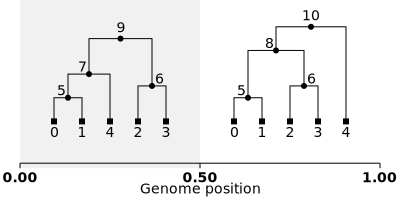

In [2]:
# Modify this code.
nodes_ex = io.StringIO("""\
id      is_sample   population      time
0       1       0               0.0
1       1       0               0.0
2       1       0               0.0
3       1       0               0.0
4       1       0               0.0
5       0       0               1.0
6       0       0               1.5
7       0       0               2.0
8       0       0               3.0
9       0       0               3.5
10      0       0               4.0
""")
edges_ex = io.StringIO("""\
id      left            right           parent  child
0       0.00000000      1.00000000      5       0
1       0.00000000      1.00000000      5       1
2       0.00000000      1.00000000      6       2
3       0.00000000      1.00000000      6       3
4       0.00000000      0.50000000      7       4
5       0.00000000      0.50000000      7       5
6       0.50000000      1.00000000      8       5
7       0.50000000      1.00000000      8       6
8       0.00000000      0.50000000      9       6
9       0.00000000      0.50000000      9       7
10      0.50000000      1.00000000      10      4
11      0.50000000      1.00000000      10      8
""")

# GT: I added edges 4 and 10.

# Load the tree sequence.
ts_ex = tskit.load_text(nodes=nodes_ex, edges=edges_ex, strict=False)

# Test by plotting it.
SVG(ts_ex.draw_svg())

### Notebook 2
<img src="pics/worksheet2-ex.png" width="400" height="400">

*Exercise:* The code below specifies a simulation of two populations in which population 1 and population 0 are created by a population split at time 200.

Can you add a third contemporary population, population 2, so that populations 1 and 2 are created by a more recent population split  at time 150? (You may need to create some other ancestral populations too.)

*GT: There was a small typo in my 'helper' code that might have made this a bit more frustrating than I meant it to be! Sorry!!*

In [3]:
# Setup.
dem = msprime.Demography()
dem.add_population(name="R", description="Plotted in red.", initial_size=500)
dem.add_population(name="B", description="Plotted in blue.",initial_size=500)
dem.add_population(name="G", description="Plotted in green.",initial_size=500)
dem.add_population(name="AncestralPopulationGB",
                   description="Plotted in purple.", initial_size=500)
dem.add_population(name="AncestralPopulationRGB",
                   description="Plotted in purple.", initial_size=500)

# Add the population split.
dem.add_population_split(time=150, derived=["G","B"], ancestral="AncestralPopulationGB")
dem.add_population_split(time=200, derived=["AncestralPopulationGB","R"],
                         ancestral="AncestralPopulationRGB")
dem

Demography(populations=[Population(initial_size=500, growth_rate=0, name='R', description='Plotted in red.', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=500, growth_rate=0, name='B', description='Plotted in blue.', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=500, growth_rate=0, name='G', description='Plotted in green.', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=500, growth_rate=0, name='AncestralPopulationGB', description='Plotted in purple.', extra_metadata={}, default_sampling_time=150, initially_active=False, id=3), Population(initial_size=500, growth_rate=0, name='AncestralPopulationRGB', description='Plotted in purple.', extra_metadata={}, default_sampling_time=200, initially_active=False, id=4)], events=[PopulationSplit(time=150, derived=['G', 'B'], ancestral='AncestralPopulationGB'), PopulationSplit(time=200, derived=['AncestralPopulationGB', 'R'], ancestral='AncestralPopulationRGB')], migration_matrix=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]))

In [4]:
# Simulate!
ts_ex = msprime.sim_ancestry(
  samples={"R" : 1, "B" : 1, "G" : 1},
  demography=dem,
  sequence_length=1000,
  random_seed=63
)

Tree on interval: Interval(left=0.0, right=1000.0)


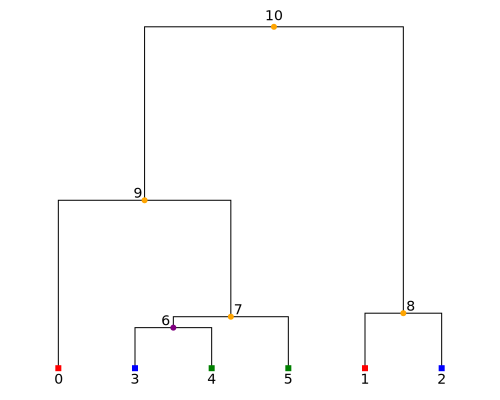

In [5]:
# Plot.
colour_map = {0:"red", 1:"blue", 2:"green", 3: "purple", 4: "orange"}
node_colours = {u.id: colour_map[u.population] for u in ts_ex.nodes()}
for tree in ts_ex.trees():
    print("Tree on interval:", tree.interval)
    # The code below will only work in a Jupyter notebook with SVG output enabled.
    display(SVG(tree.draw(node_colours=node_colours, width=500, height=400)))

### Notebook 3

*Exercise*. For most of their evolutionary history, mutations in your study organisms were well described by the Jukes-Cantor model. 
However, they were all were exposed to an environmental mutagen 50 generations ago, and from then on all new mutations were of type 👽. All of the nucleotide bases have an equal probability of mutating to an allele of type 👽. Once a nucleotide mutates to a 👽, it cannot mutate back to a normal nucleotide. Modify the code below to simulate this scenario.

In [6]:
# The underlying genealogy
ts_ex = msprime.sim_ancestry(
    10, sequence_length=1000, random_seed=1987, recombination_rate=0.001,
    population_size=1e3)

In [7]:
# Modify code here
model = msprime.MatrixMutationModel(
    alleles = ["A", "C", "G", "T", "👽"],
    root_distribution = [0.25, 0.25, 0.25, 0.25, 0.0],
    transition_matrix = [[0.0, 0.0, 0.0, 0.0, 1.0],
                         [0.0, 0.0, 0.0, 0.0, 1.0],
                         [0.0, 0.0, 0.0, 0.0, 1.0],
                         [0.0, 0.0, 0.0, 0.0, 1.0],
                         [0.0, 0.0, 0.0, 0.0, 1.0]]
)

mts_ex = msprime.sim_mutations(ts_ex, rate=1e-6, random_seed=752, start_time=50)

mts_ex = msprime.sim_mutations(mts_ex, rate=1e-6, random_seed=851, start_time=0,
                            end_time=50, model=model)

In [8]:
# Check here
print(mts_ex.tables.mutations)

╔══╤════╤════╤═════════════╤═════════════╤══════╤════════╗
║id│site│node│time         │derived_state│parent│metadata║
╠══╪════╪════╪═════════════╪═════════════╪══════╪════════╣
║0 │   0│  12│  26.19673780│            👽│    -1│     b''║
║1 │   1│ 993│1080.73366012│            C│    -1│     b''║
║2 │   2│   7│  45.06634352│            👽│    -1│     b''║
║3 │   3│1840│ 508.53139009│            T│    -1│     b''║
║4 │   4│   8│ 224.66157800│            G│    -1│     b''║
║5 │   5│ 687│6529.29267485│            T│    -1│     b''║
║6 │   6│3622│7099.53462718│            A│    -1│     b''║
║7 │   7│  13│ 413.05691858│            G│    -1│     b''║
║8 │   8│  12│ 175.08036637│            C│    -1│     b''║
║9 │   9│3205│1671.37834344│            T│    -1│     b''║
║10│  10│2619│2897.51611664│            T│    -1│     b''║
║11│  11│  12│  48.97276474│            👽│    -1│     b''║
║12│  12│   9│ 716.86318876│            A│    -1│     b''║
║13│  13│1511│1651.37247430│            T│    -1│     b'

In [9]:
# Check here
for var in mts_ex.variants():
    print(var.site.position, var.alleles, var.genotypes, sep="\t")

35.0	('C', '👽')	[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
95.0	('A', 'C')	[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
101.0	('C', '👽')	[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
118.0	('A', 'T')	[1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1]
142.0	('T', 'G')	[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
205.0	('G', 'T')	[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
268.0	('T', 'A')	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
333.0	('A', 'G')	[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
440.0	('T', 'C')	[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
456.0	('A', 'T')	[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0]
662.0	('A', 'T')	[1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1]
667.0	('T', '👽')	[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
694.0	('T', 'A')	[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
815.0	('A', 'T')	[0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
905.0	('A', 'G')	[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0]


### Notebook 4

*Exercise*. Modify the following code to compute $f_2$ statistics in 5Mb windows along the genome between the samples from populations SMALL and BIG, as well as between populations SMALL and ADMIX.

In [10]:
demography = msprime.Demography()
demography.add_population(name="SMALL", initial_size=2000)
demography.add_population(name="BIG", initial_size=5000)
demography.add_population(name="ADMIX", initial_size=2000)
demography.add_population(name="ANC", initial_size=5000)
demography.add_admixture(
    time=100, derived="ADMIX", ancestral=["SMALL", "BIG"],
    proportions=[0.5, 0.5])
demography.add_population_split(
    time=1000, derived=["SMALL", "BIG"], ancestral="ANC")

ts = msprime.sim_ancestry(
    samples={"SMALL": 100, "BIG": 100, "ADMIX" : 100},
    demography=demography,
    random_seed=2432,
    sequence_length=5e7,
    recombination_rate=1e-8
)
ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=6151)

Text(0.5, 1.0, 'Windowed F2 values')

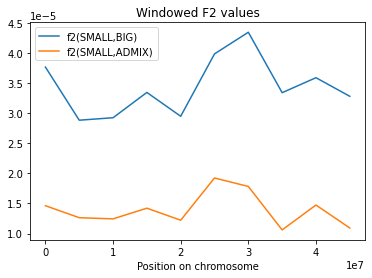

In [11]:
breakpoints = [5*i*1e6 for i in range(0, 10 + 1)]
f2_small_big = ts.f2(sample_sets=[ts.samples(0),
                                  ts.samples(1)],
                                windows=breakpoints)
f2_small_admix = ts.f2(sample_sets=[ts.samples(0),
                                  ts.samples(2)],
                                  windows=breakpoints)

# Plot.
names_to_plot = ['f2(SMALL,BIG)', 'f2(SMALL,ADMIX)']
lines = plt.plot(
    breakpoints[:-1], np.transpose([f2_small_big, f2_small_admix]))
plt.legend(lines, names_to_plot)
plt.xticks()
plt.xlabel("Position on chromosome")
plt.title("Windowed F2 values")